In [329]:
#importing required libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [330]:
#reading the dataset
df = pd.read_csv('SmartLender_Dataset.csv')
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [331]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [332]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [333]:
df["Gender"].fillna(df['Gender'].mode()[0],inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(),inplace=True)
df["Married"].fillna(df['Married'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace = True)

In [334]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [335]:
df.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [336]:
df.shape

(614, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


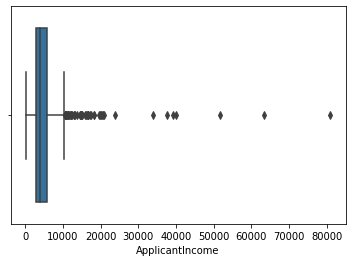

In [337]:
#outlier detection
sns.boxplot(df.ApplicantIncome)

In [338]:
Q1 = df.ApplicantIncome.quantile(0.25)
Q2 = df.ApplicantIncome.quantile(0.75)

In [339]:
IQR = Q2-Q1
IQR

2917.5

In [340]:
upper_limit = Q2 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

In [341]:
upper_limit

10171.25

In [342]:
df['ApplicantIncome'] = np.where(df['ApplicantIncome']>upper_limit,df['ApplicantIncome'].median(),df['ApplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


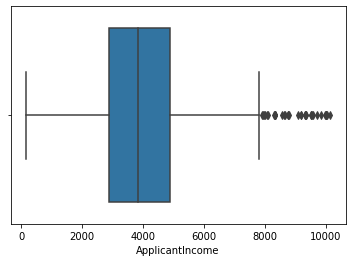

In [343]:
sns.boxplot(df.ApplicantIncome)

In [344]:
df.shape

(614, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


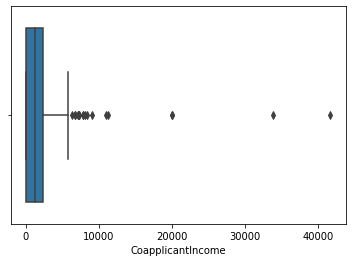

In [345]:
sns.boxplot(df.CoapplicantIncome)

In [346]:
Q1 = df.CoapplicantIncome.quantile(0.25)
Q2 = df.CoapplicantIncome.quantile(0.75)
IQR = Q2-Q1
print(IQR)
upper_limit = Q2 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print('upper_limit=',upper_limit)
df['CoapplicantIncome'] = np.where(df['CoapplicantIncome']>upper_limit,df['CoapplicantIncome'].median(),df['CoapplicantIncome'])

2297.25
upper_limit= 5743.125


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


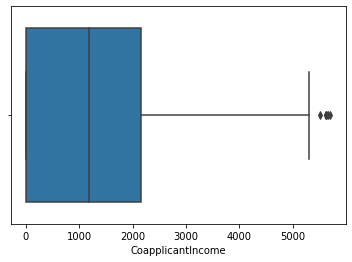

In [347]:
sns.boxplot(df.CoapplicantIncome)

In [348]:
df.shape

(614, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


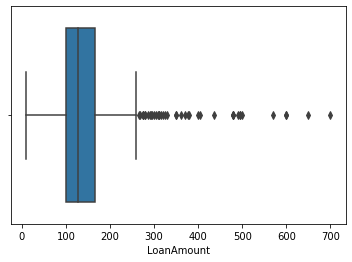

In [349]:
sns.boxplot(df.LoanAmount)

In [350]:
Q1 = df.LoanAmount.quantile(0.25)
Q2 = df.LoanAmount.quantile(0.75)
IQR = Q2-Q1
print(IQR)
upper_limit = Q2 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print('upper_limit=',upper_limit)
df['LoanAmount'] = np.where(df['LoanAmount']>upper_limit,df['LoanAmount'].median(),df['LoanAmount'])

64.5
upper_limit= 261.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


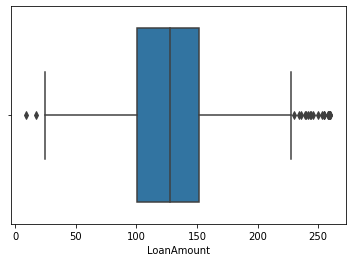

In [351]:
sns.boxplot(df.LoanAmount)

In [352]:
df.shape

(614, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


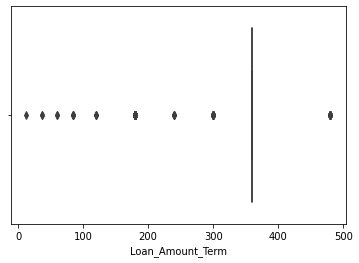

In [353]:
sns.boxplot(df.Loan_Amount_Term)

In [354]:
Q1 = df.Loan_Amount_Term.quantile(0.25)
Q2 = df.Loan_Amount_Term.quantile(0.75)
IQR = Q2-Q1
print(IQR)
upper_limit = Q2 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print('upper_limit=',upper_limit)
df['Loan_Amount_Term'] = np.where(df['Loan_Amount_Term']>upper_limit,df['Loan_Amount_Term'].median(),df['Loan_Amount_Term'])

0.0
upper_limit= 360.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


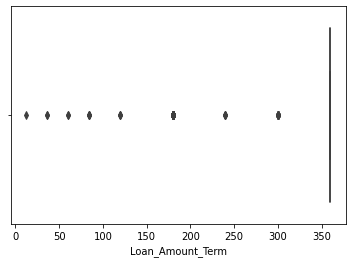

In [355]:
sns.boxplot(df.Loan_Amount_Term)

In [356]:
df.shape

(614, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


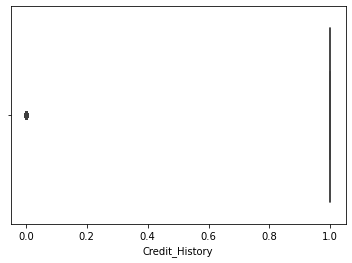

In [357]:
sns.boxplot(df.Credit_History)

In [358]:
df.Credit_History.value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [359]:
df.shape

(614, 13)

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [361]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.Married = le.fit_transform(df.Married)
df.Education = le.fit_transform(df.Education)
df.Self_Employed = le.fit_transform(df.Self_Employed)
df.Property_Area = le.fit_transform(df.Property_Area)
df.Loan_Status = le.fit_transform(df.Loan_Status)

In [362]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


In [363]:
df.to_csv("preprocessed_smartlender_dataset.csv")

In [364]:
df=df.drop(columns=['Loan_ID'],axis=1)

In [365]:
y=df.Loan_Status
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [366]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [367]:
df=df.replace('3+',3,)

In [368]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106.0,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072.0,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583.0,0.0,187.0,360.0,1.0,2,1


In [369]:

X=df.drop(columns=['Loan_Status'],axis=1)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2


In [370]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()
X_scaled=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X_scaled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,0.0,0.0,0.570528,0.000000,0.474104,1.0,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.443788,0.264515,0.474104,1.0,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.285314,0.000000,0.227092,1.0,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.243568,0.413612,0.442231,1.0,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.585644,0.000000,0.525896,1.0,1.0,1.0


In [371]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X_scaled,y, test_size=0.3,random_state=0)

In [372]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
351,1.0,0.0,0.000000,0.0,0.0,0.860947,0.730924,0.474104,1.000000,1.0,0.0
593,1.0,1.0,0.000000,0.0,0.0,0.371308,0.578846,0.529880,0.482759,1.0,0.0
320,1.0,1.0,0.000000,0.0,0.0,0.225248,0.380109,0.422311,1.000000,1.0,0.5
186,1.0,1.0,0.333333,0.0,1.0,0.203023,0.000000,0.227092,0.827586,0.0,0.0
557,1.0,1.0,1.000000,0.0,1.0,1.000000,0.000000,1.000000,1.000000,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...
277,1.0,1.0,0.000000,0.0,0.0,0.295625,0.228030,0.282869,1.000000,1.0,1.0
9,1.0,1.0,0.333333,0.0,0.0,0.366653,0.208472,0.474104,1.000000,1.0,0.5
359,1.0,1.0,1.000000,0.0,0.0,0.502252,0.555517,0.760956,1.000000,1.0,0.5
192,1.0,1.0,0.000000,1.0,0.0,0.588948,0.000000,0.601594,1.000000,1.0,1.0


In [373]:
X_train.shape

(429, 11)

In [374]:
X_test.shape

(185, 11)

In [375]:
y_train.shape

(429,)

In [376]:
y_test.shape

(185,)

In [377]:
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier()

KNEIGHBORS CLASSIFIER

In [378]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [379]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1])

In [380]:
y_pred1 = model.predict(X_train)
y_pred1

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [381]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

EVALUATION METRICS FOR KNEIGHBORS CLASSIFIER

In [382]:
print('Training accuracy: ',accuracy_score(y_train,y_pred1))

Training accuracy:  0.8065268065268065


In [383]:
print('Testing accuracy: ',accuracy_score(y_test,y_pred))

Testing accuracy:  0.8216216216216217


DECISION TREE MODEL

In [384]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)




In [385]:
y_predtree = dtree.predict(X_test)
y_predtree

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [386]:
y_pred1tree = dtree.predict(X_train)
y_pred1tree

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,

EVALUATION METRICS FOR DECISION TREE MODEL

In [387]:
print('Training accuracy: ',accuracy_score(y_train,y_pred1tree))

Training accuracy:  1.0


In [388]:
print('Testing accuracy: ',accuracy_score(y_test,y_predtree))

Testing accuracy:  0.7189189189189189


GAUSSIAN NAIVE BAYES MODEL

In [389]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

  

# making predictions on the testing set

y_predNB = gnb.predict(X_test)

  

# comparing actual response values (y_test) with predicted response values (y_pred)

from sklearn import metrics

print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_predNB)*100)

Gaussian Naive Bayes model accuracy(in %): 82.70270270270271


XGBOOST MODEL

In [390]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
regressor = xgb.XGBRegressor(n_estimators=100, reg_lambda=1, gamma=0, max_depth=3)
regressor.fit(X_train, y_train)
y_predXG = regressor.predict(X_test)
print("Mean squared error of the XGBOOST model: ", mean_squared_error(y_test, y_pred))

[17:07:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean squared error of the XGBOOST model:  0.1783783783783784
[17:07:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean squared error of the XGBOOST model:  0.1783783783783784


COMPARISON OF MODELS

In [398]:
models = [('KNN model', KNeighborsClassifier()), ('Gaussian Naives Bayes model', GaussianNB()), ('XGBOOST model', XGBClassifier()), ('Decision Tree model', DecisionTreeClassifier())]


In [399]:
results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['0', '1']


In [400]:
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        print("----------------------------------------------------------------")

KNN model
              precision    recall  f1-score   support

           0       0.78      0.49      0.60        51
           1       0.83      0.95      0.89       134

    accuracy                           0.82       185
   macro avg       0.81      0.72      0.74       185
weighted avg       0.82      0.82      0.81       185

----------------------------------------------------------------
Gaussian Naives Bayes model
              precision    recall  f1-score   support

           0       0.91      0.41      0.57        51
           1       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185

----------------------------------------------------------------
XGBOOST model
              precision    recall  f1-score   support

           0       0.79      0.45      0.58        51
           1       0.82      0.96      0.88       134

